In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [13]:
import time

from abc import ABC, abstractmethod
from functools import wraps
from typing import Any, Dict, List, Optional, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yellowbrick

from dataclasses import dataclass

from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, SparsePCA
from sklearn.pipeline import FeatureUnion, FunctionTransformer, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted

from yellowbrick.cluster import KElbowVisualizer


<IPython.core.display.Javascript object>

In [3]:
def timing(f):
    @wraps(f)
    def inner(*args, **kwargs):
        start = time.perf_counter()
        val = f(*args, **kwargs)
        end = time.perf_counter()
        print(f"Function {f.__qualname__} finished in {end-start:.2f} seconds.")

        return val

    return inner

<IPython.core.display.Javascript object>

In [4]:
sns.set_theme("notebook")

<IPython.core.display.Javascript object>

In [5]:
data = load_iris()

X = data.data
y = data.target


error = np.random.normal(0, 0.1, size=(15000, 4 ))

X = X.repeat(repeats=100, axis=0) + error
y = y.repeat(repeats=100)


<IPython.core.display.Javascript object>

In [6]:
pipeline = Pipeline([("scale", StandardScaler(with_mean=True, with_std=True))])

X_transformed = pipeline.fit_transform(X)

<IPython.core.display.Javascript object>

# K-means

In [7]:
KMeansLike = Union[KMeans, MiniBatchKMeans]

@dataclass
class KMeansVisualisation:
    
    model: KMeansLike
    k: Tuple[int, int]
    metric: str = "distortion"
    timings: bool = False
    locate_elbow: bool = True
    
        

    @timing
    def run(self, x):
        visualizer = KElbowVisualizer(
            estimator=self.model, 
            k=self.k, 
            metric=self.metric,
            timings=self.timings,
            locate_elbow=self.locate_elbow
        )

        visualizer.fit(x)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure


<IPython.core.display.Javascript object>

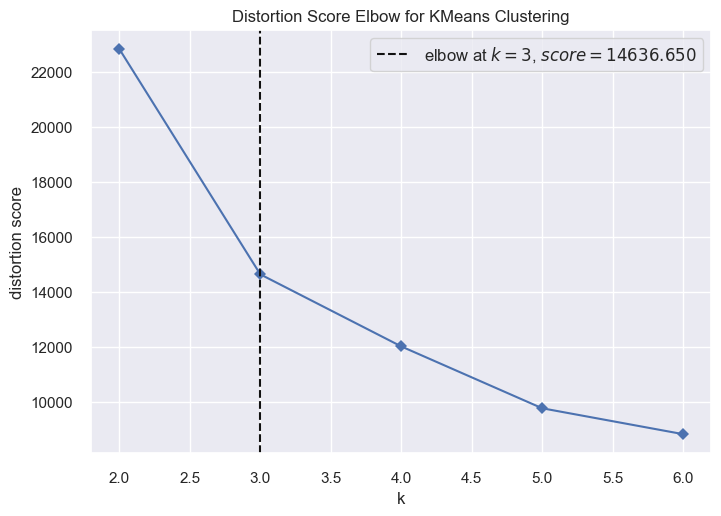

Function KMeansVisualisation.run finished in 1.01 seconds.


<IPython.core.display.Javascript object>

In [8]:
model = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=3_000,
    n_init="auto",
    copy_x=False,
    random_state=42,
    algorithm="elkan",
)


k_means_vis = KMeansVisualisation(model, metric="distortion", k=(2, 7))
k_means_vis.run(X_transformed)

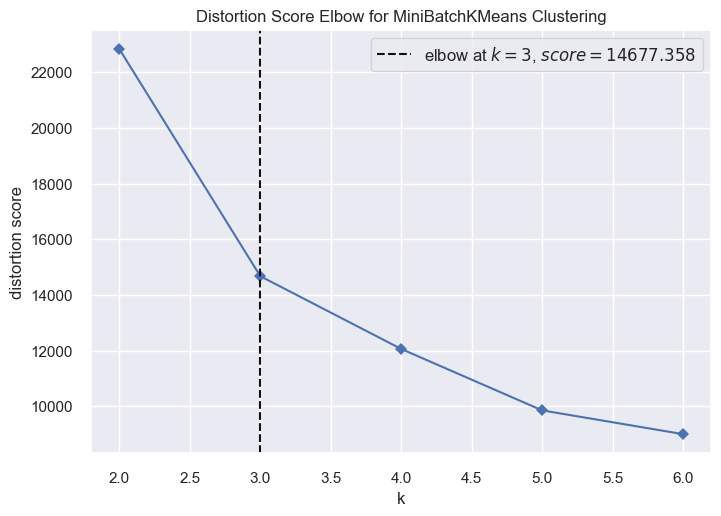

Function KMeansVisualisation.run finished in 1.02 seconds.


<IPython.core.display.Javascript object>

In [9]:
model = MiniBatchKMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=3_000,
    n_init="auto",
    random_state=42,
)


k_means_vis = KMeansVisualisation(model, metric="distortion", k=(2, 7))
k_means_vis.run(X_transformed)

# PCA

In [10]:
pca = PCA(n_components=4)
pca.fit(X_transformed)

PCA(n_components=4)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'n_components')

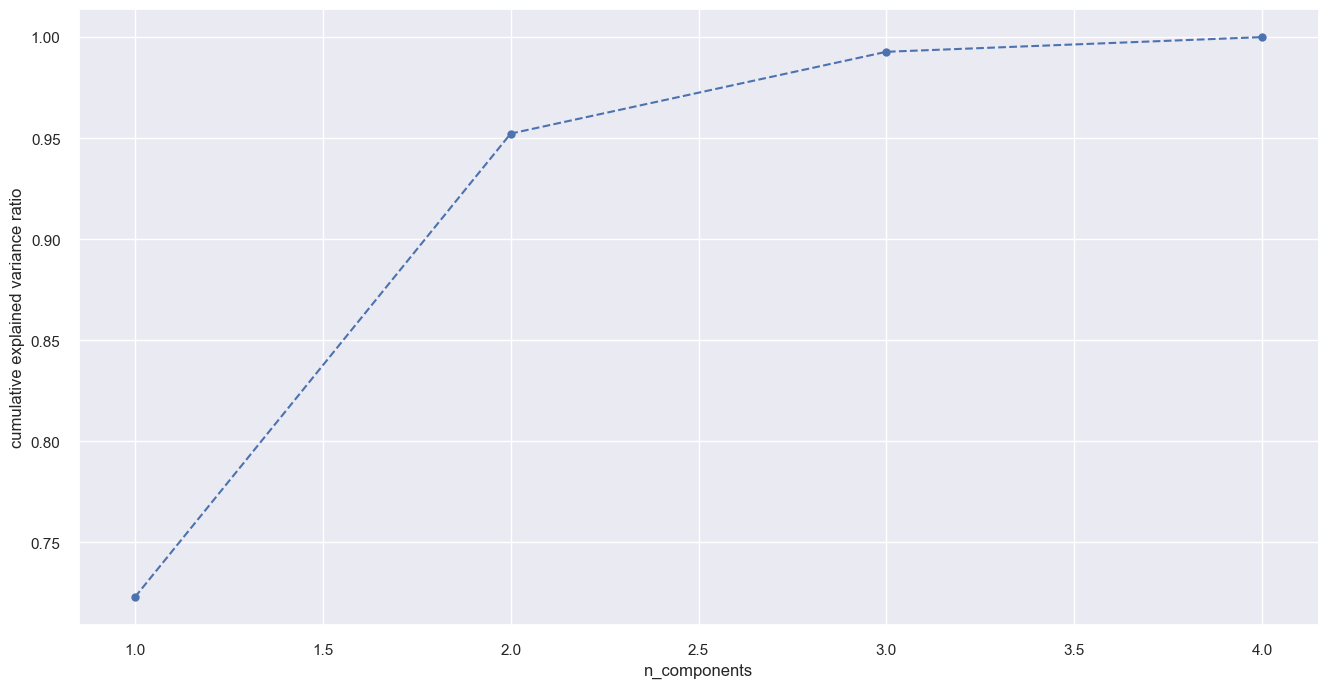

<IPython.core.display.Javascript object>

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

check_is_fitted(pca)

ax.plot(
    range(1, pca.n_components + 1),
    pca.explained_variance_ratio_.cumsum(),
    linestyle="dashed",
    marker="o",
)


ax.set_ylabel("cumulative explained variance ratio")
ax.set_xlabel("n_components")

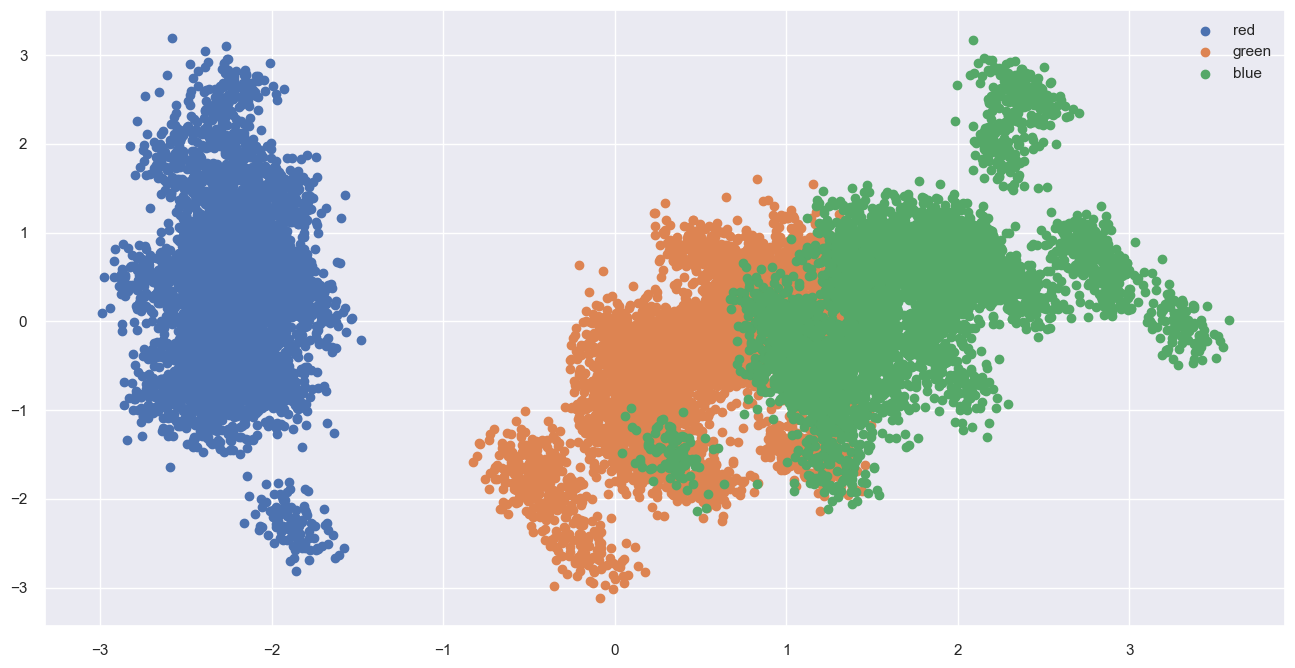

<IPython.core.display.Javascript object>

In [12]:
colors = ["red", "green", "blue"]
targets = [0, 1, 2]
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

X_pca = pca.transform(X_transformed)

for c, target in zip(colors, targets):
    ax.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=c)
plt.legend()